# 🏏 IPL Cricket Data Analysis (Sample Project)

This notebook performs exploratory data analysis on IPL match and delivery datasets.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load IPL datasets (matches.csv and deliveries.csv should be in the data folder)
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

# Display first few rows of both datasets
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [41]:
# Basic Info
print("Matches Data Info:");
print(matches.info());

Matches Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3         

In [42]:
print("\nDeliveries Data Info:");
print(deliveries.info());


Deliveries Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs     

In [10]:
# Total Matches Played Per Team
team1_counts = matches['team1'].value_counts()
team2_counts = matches['team2'].value_counts()
total_matches = team1_counts.add(team2_counts, fill_value=0).astype(int)
total_matches.sort_values(ascending=False)

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Delhi Capitals                  16
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

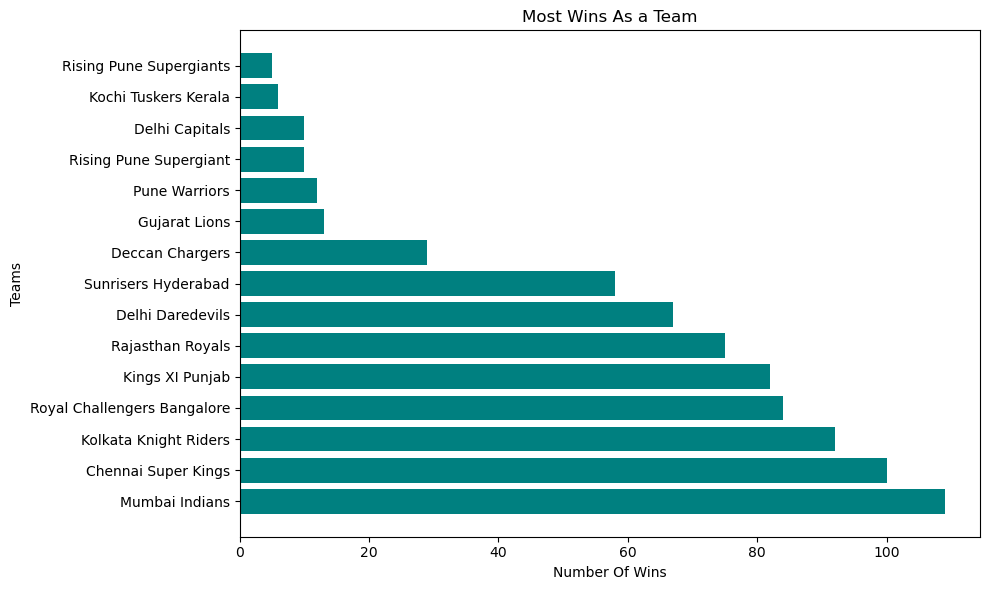

In [53]:
# Most Matches Won
most_wins = matches['winner'].value_counts()
plt.figure(figsize=(10,6))
plt.barh(most_wins.index,most_wins.values, color='teal');
plt.title('Most Wins As a Team')
plt.xlabel('Number Of Wins')
plt.ylabel('Teams')
plt.tight_layout()
plt.savefig( 'Top_Team_barh.png')

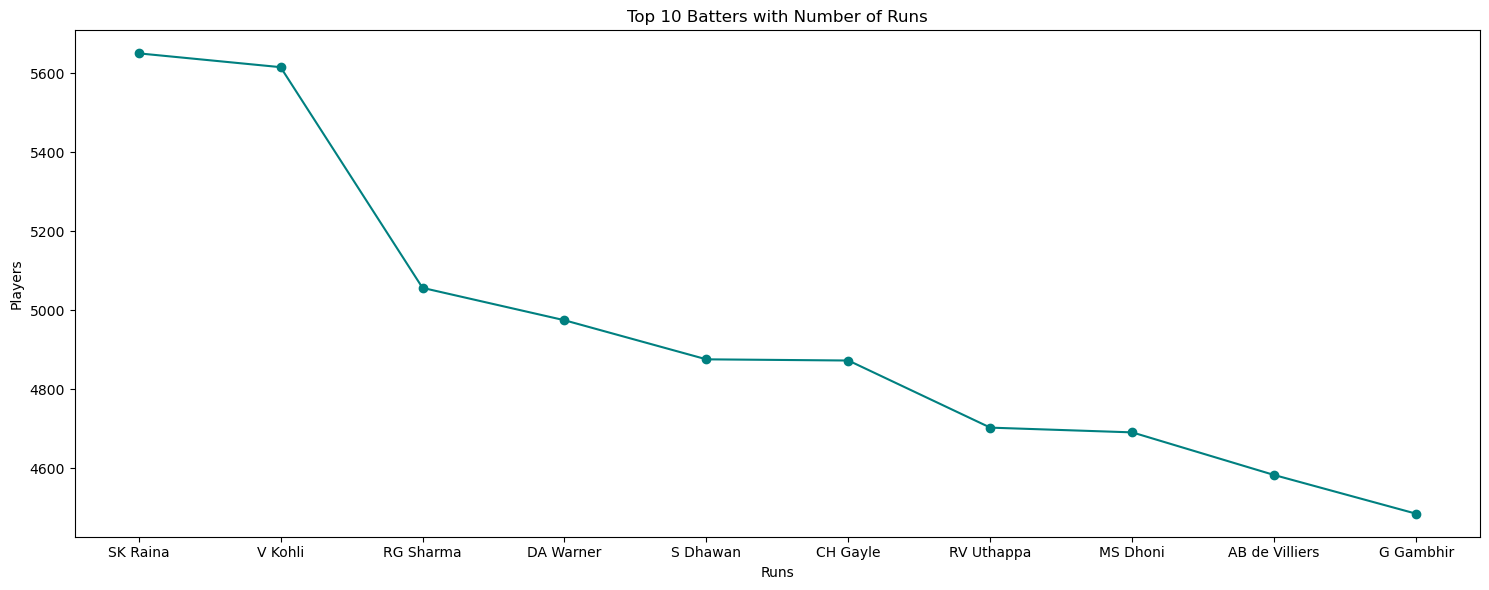

In [47]:
# Top 10 Batsmen by Total Runs
top_batsmen = deliveries.groupby('batsman')['total_runs'].sum().sort_values(ascending=False).head(10);
plt.figure(figsize=(15,6))
plt.plot(top_batsmen.index,top_batsmen.values, color='teal',marker='o');
plt.title('Top 10 Batters with Number of Runs')
plt.xlabel('Runs')
plt.ylabel('Players');
plt.tight_layout()
plt.savefig( 'top_player_bar.png')

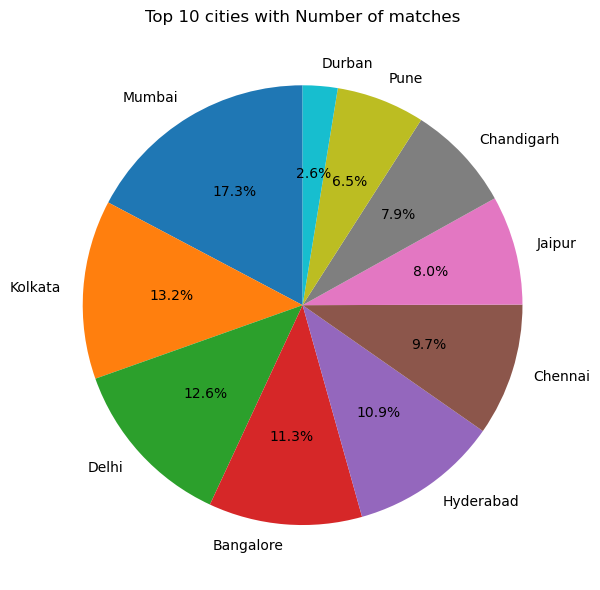

In [40]:
# Matches Played per City
matches_per_city = matches['city'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.pie(matches_per_city,labels=matches_per_city.index,autopct='%1.1f%%',startangle=90,);
plt.title('Top 10 cities with Number of matches')
plt.tight_layout()
plt.savefig( 'city_bar.png')

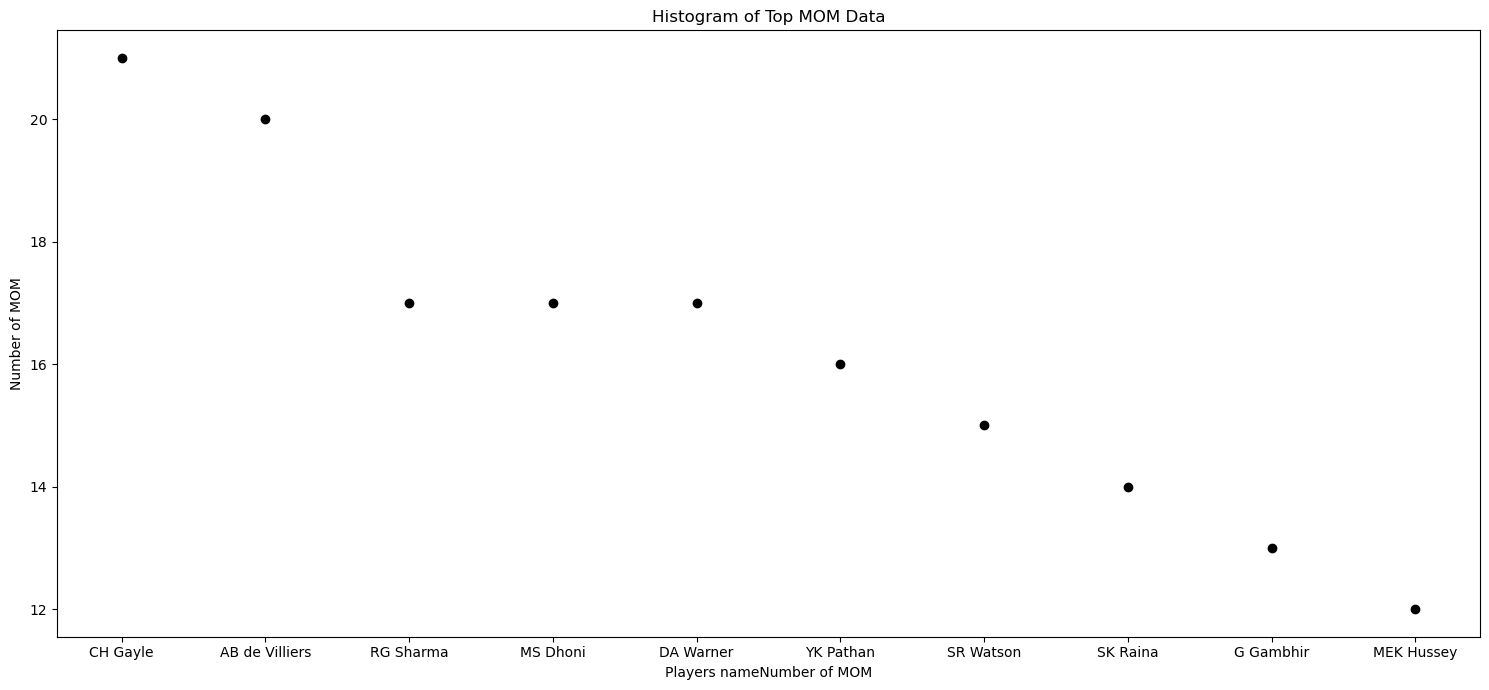

In [77]:
# Top 10 Players with Most "Player of the Match" Awards
top_mom = matches['player_of_match'].value_counts().head(10)
top_mom
plt.figure(figsize=(15,7))
plt.scatter(top_mom.index,top_mom.values,marker='o',color='black')
plt.title('Histogram of Top MOM Data')
plt.xlabel('Players nameNumber of MOM')
plt.ylabel('Number of MOM')
plt.tight_layout()
plt.savefig( 'MOM_Scatter.png')